In [9]:
# Importing the relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

%matplotlib inline

# ensuring we see all the columns in the dataframe
pd.set_option('display.max_columns', 200)

In [10]:
# Importing the cleaned data
df = pd.read_parquet('../data/02_data_cleaning.parquet')

# Previewing the data
df.head()

,index,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Airport_Code,Airport_Name,Injury_Severity,Aircraft_damage,Aircraft_Category,Registration_Number,Make,Model,Amateur_Built,Number_of_Engines,Engine_Type,FAR_Description,Schedule,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date,Year,People_Onboard,Abbreviation,US_State
0,7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,None,BLACKBURN AG STRIP,Non-Fatal,Substantial,Airplane,N2482N,Cessna,140,No,1.0,Reciprocating,Part 91: General Aviation,None,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,1982,2,WA,Washington
1,8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,N58,HANOVER,Non-Fatal,Substantial,Airplane,N7967Q,Cessna,401B,No,2.0,Reciprocating,Part 91: General Aviation,None,Business,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,1982,2,NJ,New Jersey
2,9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,JAX,JACKSONVILLE INTL,Non-Fatal,Substantial,None,N3906K,North American,NAVION L-17B,No,1.0,Reciprocating,None,None,Personal,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982,1982,3,FL,Florida
3,10,20020909X01559,Accident,FTW82DA034,1982-01-01,"HOBBS, NM",United States,None,None,Non-Fatal,Substantial,None,N44832,Piper,PA-28-161,No,1.0,Reciprocating,None,None,Personal,0.0,0.0,0.0,1.0,VMC,Approach,Probable Cause,01-01-1982,1982,1,NM,New Mexico
4,11,20020909X01558,Accident,ATL82DKJ10,1982-01-01,"TUSKEGEE, AL",United States,None,TUSKEGEE,Non-Fatal,Substantial,None,N4275S,Beech,V35B,No,1.0,Reciprocating,None,None,Personal,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,01-01-1982,1982,1,AL,Alabama


# Make Fatality Rate

In [11]:
# Calculating % Fatal
df['Fatal_%'] = ((df['Total_Fatal_Injuries'] / df['People_Onboard']) * 100).replace([np.inf, -np.inf], np.nan)

# Filling null values with 0
df['Fatal_%'] = df['Fatal_%'].fillna(0)

# Preview
df['Fatal_%'].head(10)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6    100.0
7    100.0
8    100.0
9      0.0
Name: Fatal_%, dtype: float64

In [12]:
# Value Counts of manufacturers
manufacturers = df['Make'].value_counts()

# Filter manufacturers with 100 or more appearances
valid_makes = df['Make'].value_counts().reset_index().query('count >= 100')

# Filter the original dataframe to keep only these manufacturers
manf_fatality = (df[df['Make'].isin(valid_makes['Make'])].groupby('Make')['Fatal_%'].mean().sort_values().reset_index())

/var/folders/dk/bbbpl6jd64q1jk5kph5vgr300000gn/T/ipykernel_46781/2597205433.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation = 45, ha = 'right')


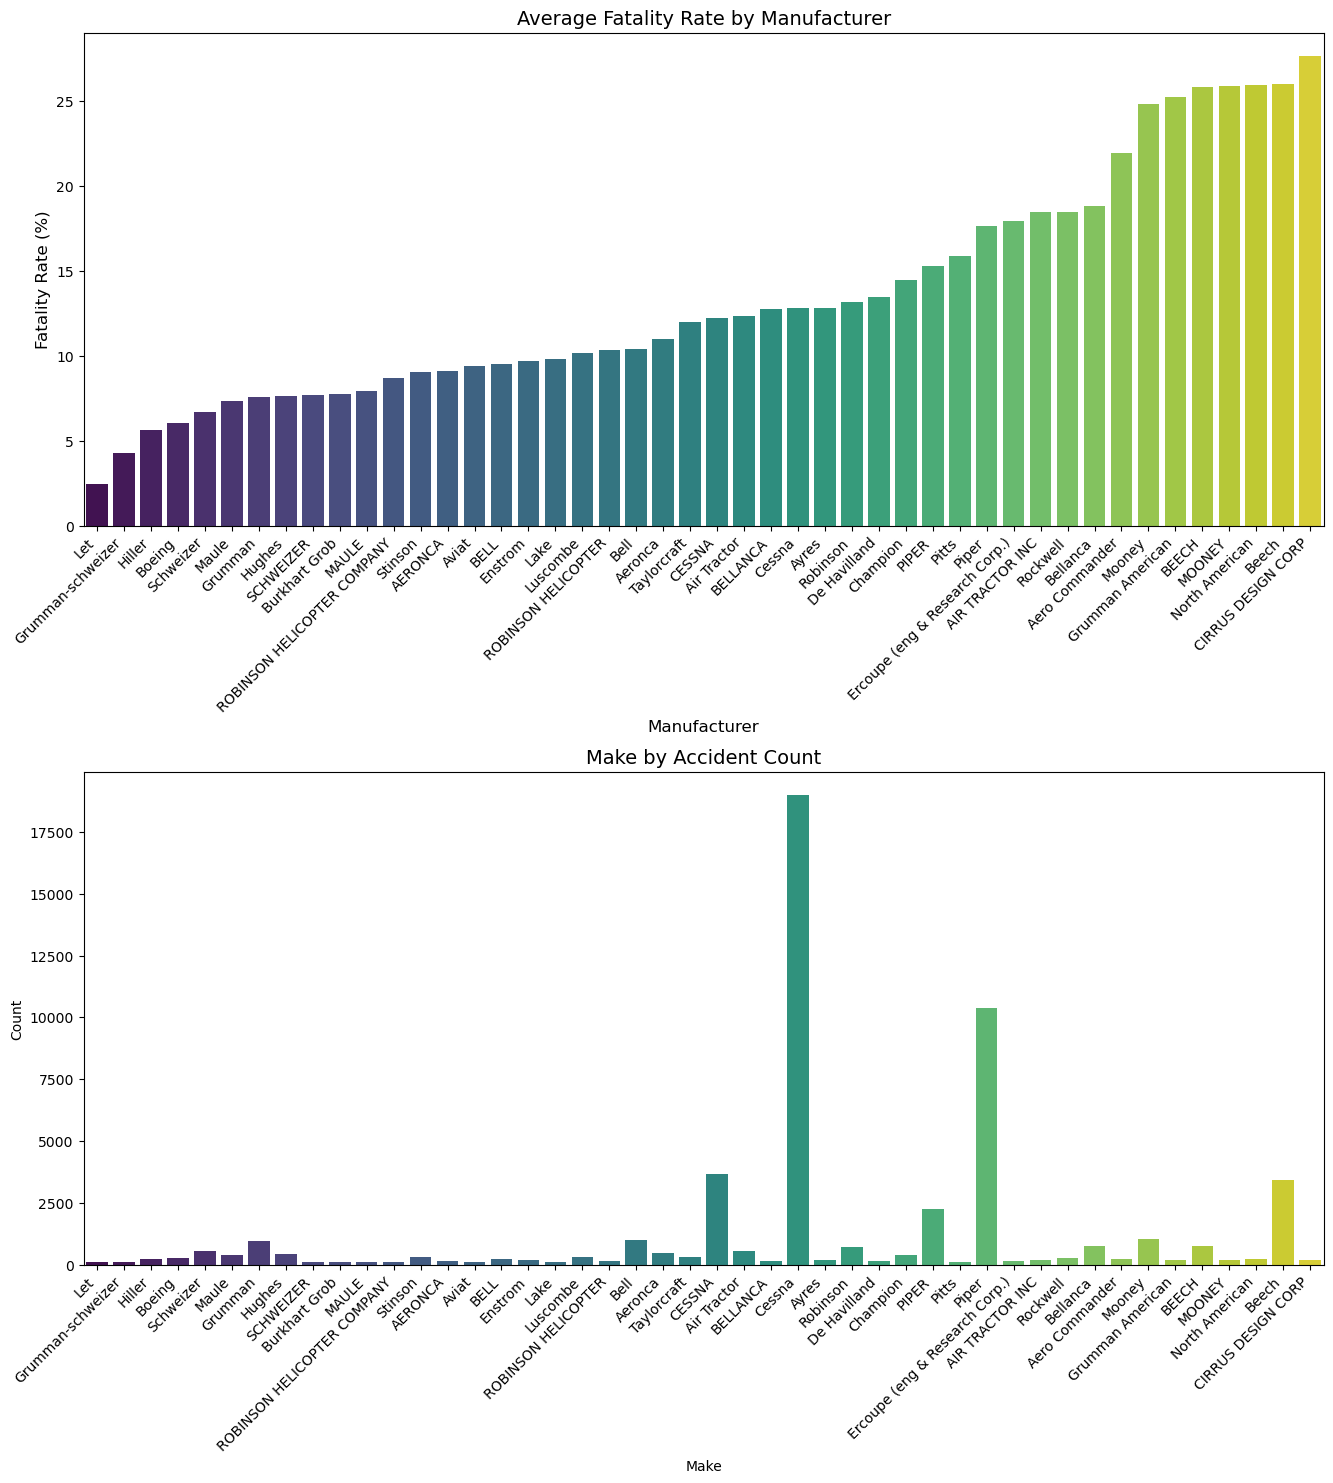

In [43]:
# Plot of Injury Fatality Rate by Manufacutuer

# Creating the figure 
fig, axes = plt.subplots(2, 1, figsize = (16, 16))

# Creating the plot 1
sns.barplot(data = manf_fatality, x = 'Make', y = 'Fatal_%', hue = 'Make', palette = "viridis", legend = False, ax = axes[0]);

# Formatting
axes[0].set_title("Average Fatality Rate by Manufacturer", fontsize = 14)
axes[0].set_xlabel('Manufacturer', fontsize = 12)
axes[0].set_ylabel('Fatality Rate (%)', fontsize = 12)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation = 45, ha = 'right')

# Plotting
sns.barplot(data = risk_score, x = 'Make', y = 'Accident_Count', hue = 'Make', palette = 'viridis', ax = axes[1])

# Labelling the plot
axes[1].set_title('Make by Accident Count', fontsize = 14)
axes[1].set_xlabel('Make')
axes[1].set_ylabel('Count')
plt.xticks(rotation = 45, ha = 'right')

# Adjusting Vertical spacing
plt.subplots_adjust(hspace = 0.5)

# Show the plot
plt.show();


/var/folders/dk/bbbpl6jd64q1jk5kph5vgr300000gn/T/ipykernel_46781/3369138908.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation = 45, ha = 'right')


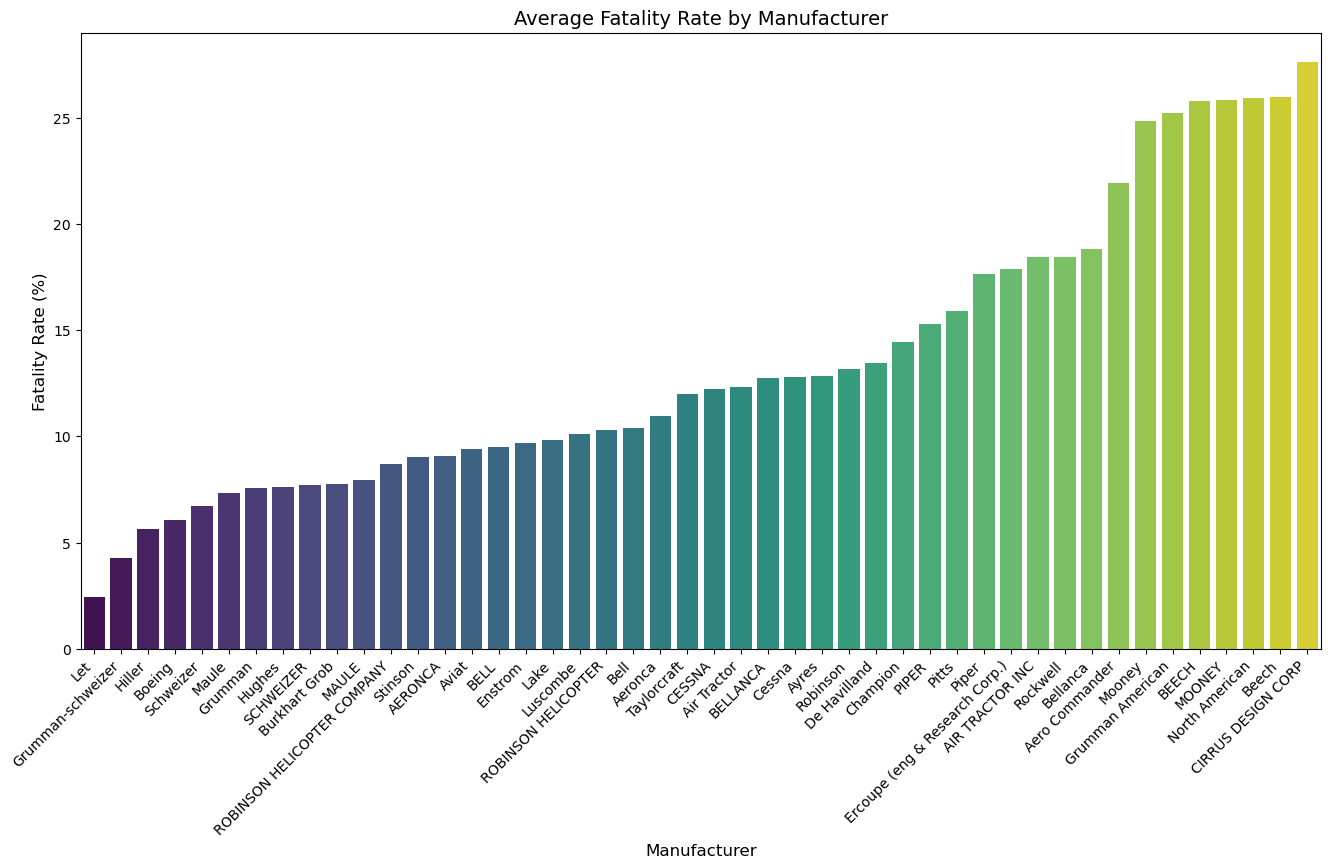

In [46]:
# Creating the figure 
fig, axes = plt.subplots(1, 1, figsize = (16, 8))

# Creating the plot 1
sns.barplot(data = manf_fatality, x = 'Make', y = 'Fatal_%', hue = 'Make', palette = "viridis", legend = False);

# Formatting
axes.set_title("Average Fatality Rate by Manufacturer", fontsize = 14)
axes.set_xlabel('Manufacturer', fontsize = 12)
axes.set_ylabel('Fatality Rate (%)', fontsize = 12)
axes.set_xticklabels(axes.get_xticklabels(), rotation = 45, ha = 'right')

# Showing the plot
plt.show();

In [23]:
# Calculating risk scores
risk_score = manf_fatality.merge(valid_makes, on='Make', how='inner')

# Renaming Columns
risk_score.rename(columns = {'count' : 'Accident_Count', 'Fatal_%' : 'Fatality_Rate'}, inplace = True)

# Preview
risk_score.head(15)

,Make,Fatality_Rate,Accident_Count
0,Let,2.427184,103
1,Grumman-schweizer,4.273504,117
2,Hiller,5.623306,246
3,Boeing,6.048906,259
4,Schweizer,6.703230,547
5,Maule,7.345528,410
6,Grumman,7.550886,970
7,Hughes,7.619048,427
8,SCHWEIZER,7.692308,117
9,Burkhart Grob,7.766990,103


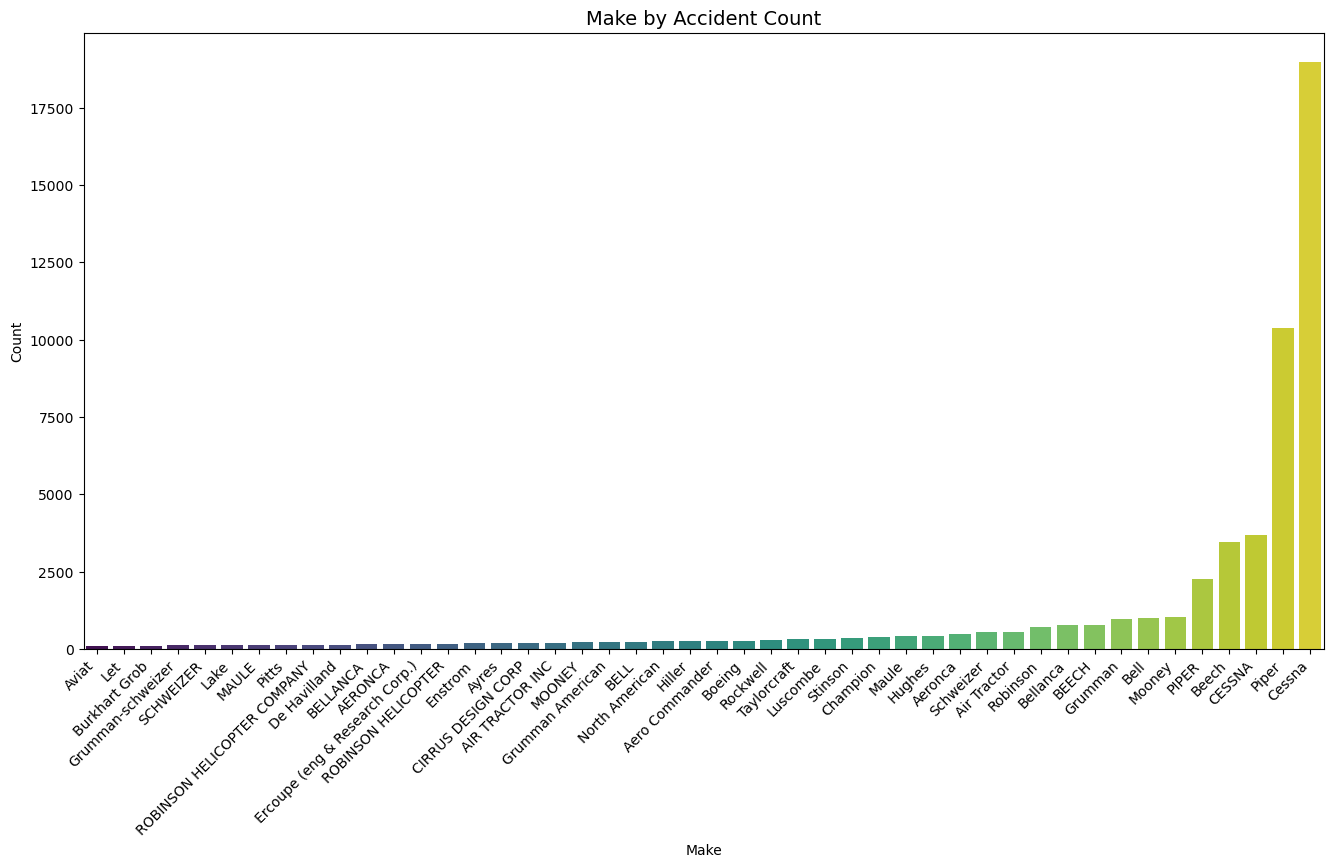

In [50]:
# Creating the figure 
fig, ax = plt.subplots(1, 1, figsize = (16, 8))

# Plotting
risk_score_sorted = risk_score.sort_values(by = 'Accident_Count', ascending = True)

sns.barplot(data = risk_score_sorted, x = 'Make', y = 'Accident_Count', hue = 'Make', palette = 'viridis')

# Labelling the plot
ax.set_title('Make by Accident Count', fontsize = 14)
ax.set_xlabel('Make')
ax.set_ylabel('Count')
plt.xticks(rotation = 45, ha = 'right')

# Show the plot
plt.show();

In [51]:
df

,index,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Airport_Code,Airport_Name,Injury_Severity,Aircraft_damage,Aircraft_Category,Registration_Number,Make,Model,Amateur_Built,Number_of_Engines,Engine_Type,FAR_Description,Schedule,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date,Year,People_Onboard,Abbreviation,US_State,Fatal_%
0,7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,None,BLACKBURN AG STRIP,Non-Fatal,Substantial,Airplane,N2482N,Cessna,140,No,1.0,Reciprocating,Part 91: General Aviation,None,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,1982,2,WA,Washington,0.0
1,8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,N58,HANOVER,Non-Fatal,Substantial,Airplane,N7967Q,Cessna,401B,No,2.0,Reciprocating,Part 91: General Aviation,None,Business,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,1982,2,NJ,New Jersey,0.0
2,9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,JAX,JACKSONVILLE INTL,Non-Fatal,Substantial,None,N3906K,North American,NAVION L-17B,No,1.0,Reciprocating,None,None,Personal,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982,1982,3,FL,Florida,0.0
3,10,20020909X01559,Accident,FTW82DA034,1982-01-01,"HOBBS, NM",United States,None,None,Non-Fatal,Substantial,None,N44832,Piper,PA-28-161,No,1.0,Reciprocating,None,None,Personal,0.0,0.0,0.0,1.0,VMC,Approach,Probable Cause,01-01-1982,1982,1,NM,New Mexico,0.0
4,11,20020909X01558,Accident,ATL82DKJ10,1982-01-01,"TUSKEGEE, AL",United States,None,TUSKEGEE,Non-Fatal,Substantial,None,N4275S,Beech,V35B,No,1.0,Reciprocating,None,None,Personal,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,01-01-1982,1982,1,AL,Alabama,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68112,82221,20221212106443,Accident,WPR23LA064,2022-12-09,"Casa Grande, AZ",United States,CGZ,Casa Grande Municipal Airport,Non-Fatal,Substantial,Airplane,190DK,ARADO-FLUGZEUGWERKE GMBH,FW190 A-5,No,1.0,None,091,None,Personal,0.0,0.0,0.0,1.0,VMC,None,None,13-12-2022,2022,1,AZ,Arizona,0.0
68113,82226,20221212106444,Accident,ERA23LA085,2022-12-12,"Knoxville, TN",United States,DKX,KNOXVILLE DOWNTOWN ISLAND,Non-Fatal,Substantial,Airplane,N783SF,CESSNA,172,No,1.0,None,091,None,Instructional,0.0,0.0,0.0,1.0,VMC,None,None,15-12-2022,2022,1,TN,Tennessee,0.0
68114,82233,20221215106463,Accident,ERA23LA090,2022-12-14,"San Juan, PR",United States,SIG,FERNANDO LUIS RIBAS DOMINICCI,Non-Fatal,Substantial,Airplane,N416PC,CIRRUS DESIGN CORP,SR22,No,1.0,None,091,None,Personal,0.0,0.0,0.0,1.0,VMC,None,None,27-12-2022,2022,1,PR,Puerto Rico,0.0
68115,82237,20221219106470,Accident,ERA23LA091,2022-12-16,"Brooksville, FL",United States,BKV,BROOKSVILLE-TAMPA BAY RGNL,Minor,Substantial,Airplane,N5405V,CESSNA,R172K,No,1.0,None,091,None,Personal,0.0,1.0,0.0,0.0,VMC,None,None,23-12-2022,2022,1,FL,Florida,0.0


In [66]:
# Grouping Cessna and Piper accidents by flight purpose
cessna_piper_purpose = (
    df[df['Make'].isin(['Cessna', 'Piper'])]
    .groupby('Make')['Purpose_of_flight']
    .value_counts(normalize = True)
)

# Renaming the Index
cessna_piper_purpose = cessna_piper_purpose.rename_axis(index={'Purpose_of_flight': 'Flight_Purpose'})

# Convert Series to DataFrame
cessna_piper_purpose = cessna_piper_purpose.reset_index(name='Proportion')

cessna_piper_purpose

,Make,Flight_Purpose,Proportion
0,Cessna,Personal,0.668441
1,Cessna,Instructional,0.223200
2,Cessna,Business,0.061611
3,Cessna,Aerial Application,0.030779
4,Cessna,Positioning,0.015969
5,Piper,Personal,0.733969
6,Piper,Instructional,0.148180
7,Piper,Business,0.070191
8,Piper,Aerial Application,0.034373
9,Piper,Positioning,0.013287


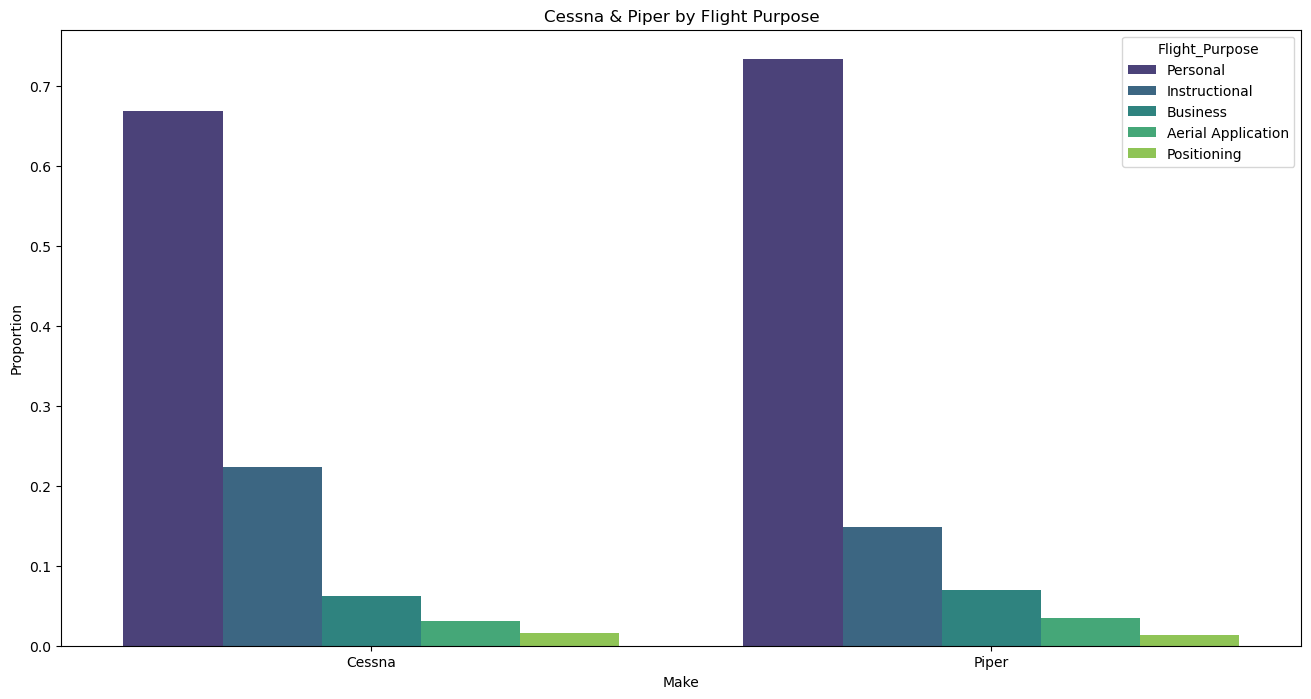

In [70]:
# Creating the figure
fig, ax = plt.subplots(1, 1, figsize = (16, 8))

# Creating the plot
sns.barplot(data = cessna_piper_purpose, x = 'Make', y = 'Proportion', hue = 'Flight_Purpose', palette = 'viridis')

# Labelling the plot
plt.title('Cessna & Piper by Flight Purpose')
plt.xlabel('Make')
plt.ylabel('Proportion')

# Showing the plot
plt.show();